In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [33]:
data = pd.read_csv("2w.csv")

Features and Target variables

In [34]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# FOR LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','2W','3W']].values
target = data['SD'].values

Normalize data

In [35]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [37]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [38]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800


40/40 [==============================] - 2s 10ms/step - loss: 303.2413 - val_loss: 214.5321
Epoch 2/800
40/40 [==============================] - 0s 5ms/step - loss: 60.0235 - val_loss: 45.5405
Epoch 3/800
40/40 [==============================] - 0s 4ms/step - loss: 41.1293 - val_loss: 44.5324
Epoch 4/800
40/40 [==============================] - 0s 4ms/step - loss: 40.7244 - val_loss: 43.3383
Epoch 5/800
40/40 [==============================] - 0s 4ms/step - loss: 40.2357 - val_loss: 43.0820
Epoch 6/800
40/40 [==============================] - 0s 4ms/step - loss: 40.2247 - val_loss: 44.1699
Epoch 7/800
40/40 [==============================] - 0s 4ms/step - loss: 39.9133 - val_loss: 43.3447
Epoch 8/800
40/40 [==============================] - 0s 3ms/step - loss: 39.2341 - val_loss: 43.0636
Epoch 9/800
40/40 [==============================] - 0s 4ms/step - loss: 40.1321 - val_loss: 42.0576
Epoch 10/800
40/40 [==============================] - 0s 3ms/step - loss: 37.8755 - val_loss: 39.945

Visualize LSTM results

0.6091091921408306


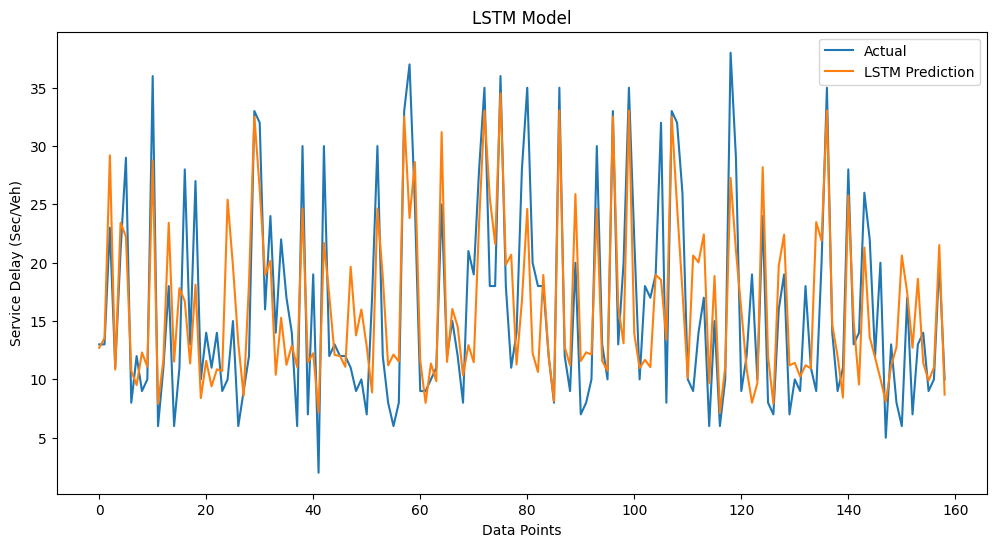

In [39]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [93]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=600, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/600
20/20 [==============================] - 5s 37ms/step - loss: 314.8004 - val_loss: 321.7375
Epoch 2/600
20/20 [==============================] - 0s 8ms/step - loss: 219.4600 - val_loss: 125.2360
Epoch 3/600
20/20 [==============================] - 0s 8ms/step - loss: 59.0990 - val_loss: 55.7711
Epoch 4/600
20/20 [==============================] - 0s 7ms/step - loss: 39.3081 - val_loss: 36.8795
Epoch 5/600
20/20 [==============================] - 0s 7ms/step - loss: 34.6644 - val_loss: 35.0513
Epoch 6/600
20/20 [==============================] - 0s 8ms/step - loss: 33.6211 - val_loss: 34.8270
Epoch 7/600
20/20 [==============================] - 0s 8ms/step - loss: 33.2724 - val_loss: 35.0722
Epoch 8/600
20/20 [==============================] - 0s 7ms/step - loss: 33.7017 - val_loss: 34.8487
Epoch 9/600
20/20 [==============================] - 0s 7ms/step - loss: 33.5970 - val_loss: 35.1943
Epoch 10/600
20/20 [==============================] - 0s 8ms/step - loss: 34.3126 - va

Visualize BiLSTM results

0.6034190581524045


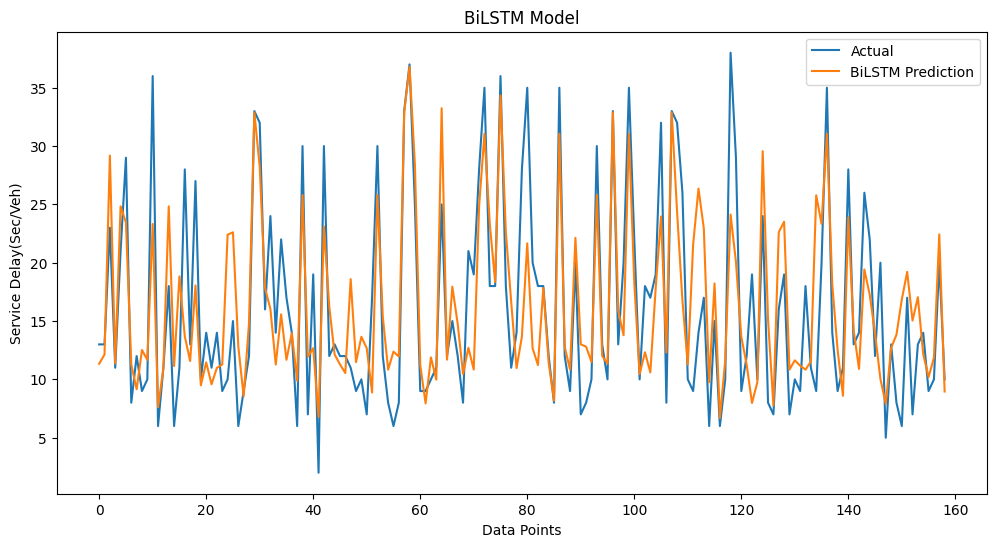

In [95]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [42]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
40/40 [==============================] - 2s 11ms/step - loss: 293.8442 - val_loss: 195.7424
Epoch 2/800
40/40 [==============================] - 0s 5ms/step - loss: 64.6860 - val_loss: 45.9610
Epoch 3/800
40/40 [==============================] - 0s 5ms/step - loss: 42.5066 - val_loss: 42.7160
Epoch 4/800
40/40 [==============================] - 0s 5ms/step - loss: 40.0467 - val_loss: 41.7544
Epoch 5/800
40/40 [==============================] - 0s 4ms/step - loss: 38.4738 - val_loss: 42.2994
Epoch 6/800
40/40 [==============================] - 0s 6ms/step - loss: 38.7700 - val_loss: 40.9127
Epoch 7/800
40/40 [==============================] - 0s 4ms/step - loss: 38.3172 - val_loss: 40.5859
Epoch 8/800
40/40 [==============================] - 0s 4ms/step - loss: 37.6145 - val_loss: 40.2514
Epoch 9/800
40/40 [==============================] - 0s 4ms/step - loss: 38.9912 - val_loss: 44.9779
Epoch 10/800
40/40 [==============================] - 0s 4ms/step - loss: 38.1192 - val_

Visualize GRU results

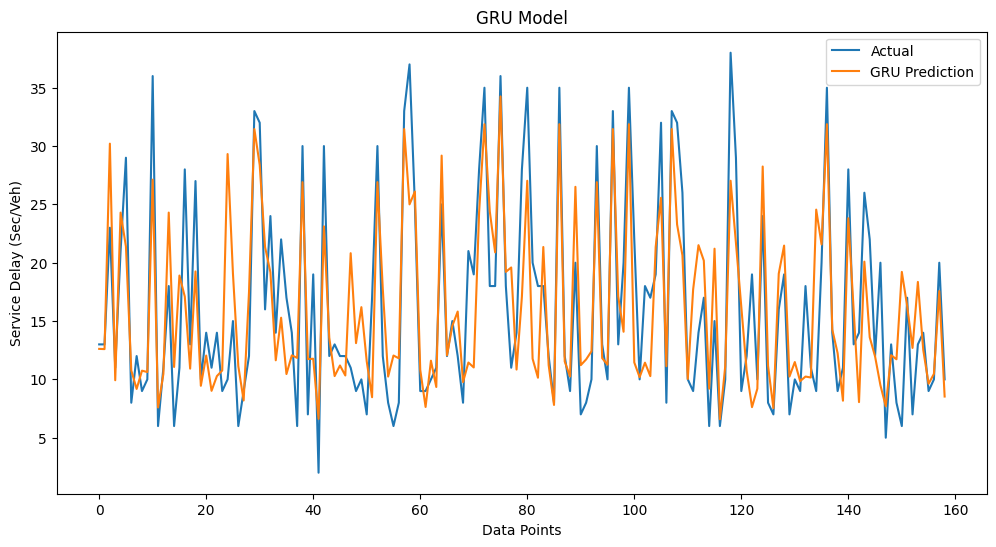

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [67]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/500
20/20 [==============================] - 4s 31ms/step - loss: 303.4637 - val_loss: 283.1068
Epoch 2/500
20/20 [==============================] - 0s 8ms/step - loss: 143.4967 - val_loss: 52.4887
Epoch 3/500
20/20 [==============================] - 0s 10ms/step - loss: 43.0259 - val_loss: 39.8309
Epoch 4/500
20/20 [==============================] - 0s 7ms/step - loss: 36.8319 - val_loss: 35.8232
Epoch 5/500
20/20 [==============================] - 0s 6ms/step - loss: 34.9863 - val_loss: 34.8828
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 33.4217 - val_loss: 35.5020
Epoch 7/500
20/20 [==============================] - 0s 6ms/step - loss: 34.4936 - val_loss: 34.6987
Epoch 8/500
20/20 [==============================] - 0s 6ms/step - loss: 33.8868 - val_loss: 35.6279
Epoch 9/500
20/20 [==============================] - 0s 7ms/step - loss: 34.4702 - val_loss: 34.9106
Epoch 10/500
20/20 [==============================] - 0s 6ms/step - loss: 33.5994 - va

Visualize BiGRU results

0.6207182132074389


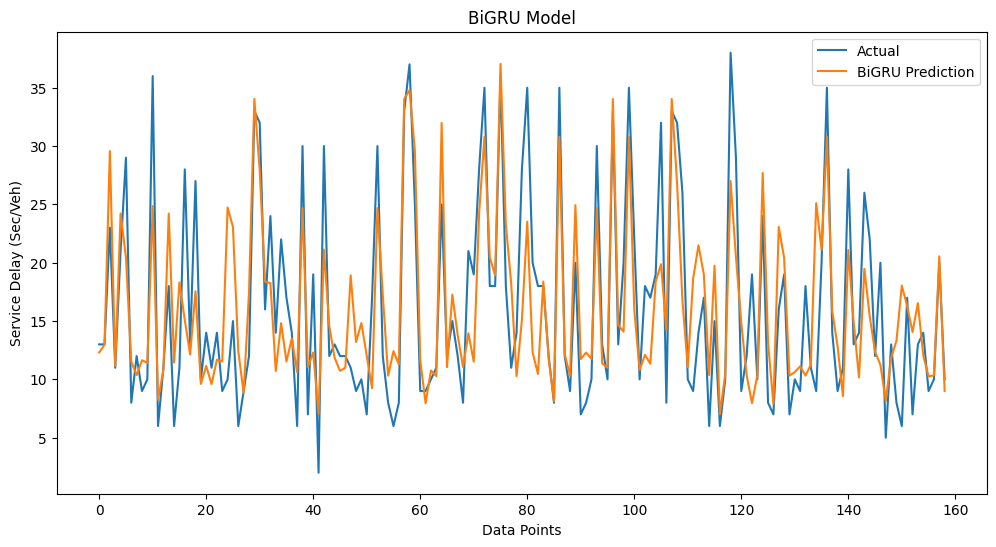

In [68]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [46]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)


Epoch 1/800
40/40 [==============================] - 1s 6ms/step - loss: 292.4345 - val_loss: 254.6306
Epoch 2/800
40/40 [==============================] - 0s 4ms/step - loss: 140.4379 - val_loss: 51.1061
Epoch 3/800
40/40 [==============================] - 0s 3ms/step - loss: 39.9723 - val_loss: 39.3530
Epoch 4/800
40/40 [==============================] - 0s 2ms/step - loss: 37.2557 - val_loss: 38.5457
Epoch 5/800
40/40 [==============================] - 0s 3ms/step - loss: 35.9360 - val_loss: 37.2095
Epoch 6/800
40/40 [==============================] - 0s 3ms/step - loss: 35.0908 - val_loss: 36.6043
Epoch 7/800
40/40 [==============================] - 0s 2ms/step - loss: 34.6634 - val_loss: 36.1792
Epoch 8/800
40/40 [==============================] - 0s 2ms/step - loss: 34.2641 - val_loss: 35.6488
Epoch 9/800
40/40 [==============================] - 0s 3ms/step - loss: 33.5216 - val_loss: 35.1945
Epoch 10/800
40/40 [==============================] - 0s 2ms/step - loss: 33.3221 - val

Visualize CNN results

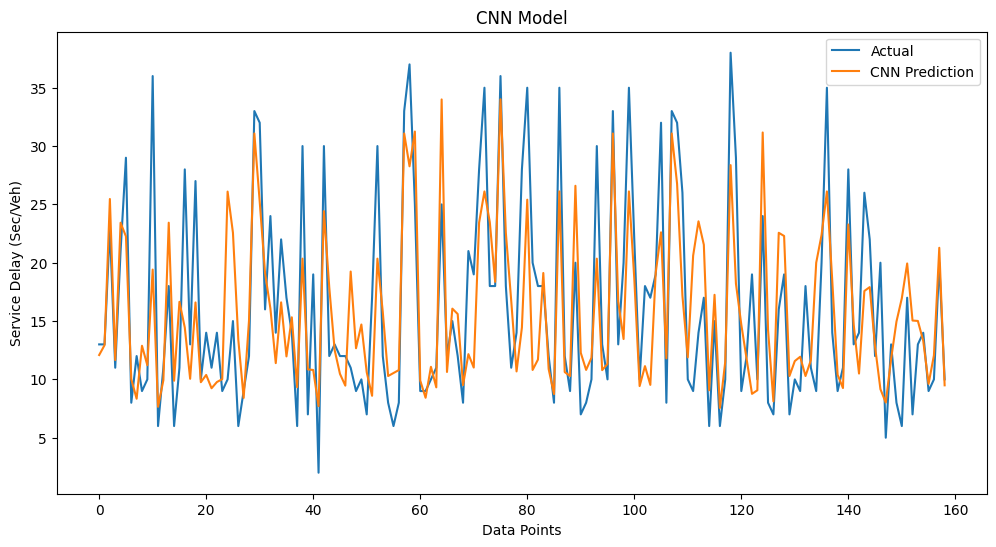

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [48]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
40/40 [==============================] - 1s 6ms/step - loss: 301.6775 - val_loss: 253.1337
Epoch 2/800
40/40 [==============================] - 0s 3ms/step - loss: 85.6291 - val_loss: 45.1995
Epoch 3/800
40/40 [==============================] - 0s 2ms/step - loss: 38.2173 - val_loss: 39.5425
Epoch 4/800
40/40 [==============================] - 0s 3ms/step - loss: 35.1154 - val_loss: 36.7704
Epoch 5/800
40/40 [==============================] - 0s 3ms/step - loss: 35.2230 - val_loss: 36.9802
Epoch 6/800
40/40 [==============================] - 0s 3ms/step - loss: 34.3410 - val_loss: 37.8500
Epoch 7/800
40/40 [==============================] - 0s 3ms/step - loss: 33.9417 - val_loss: 35.6461
Epoch 8/800
40/40 [==============================] - 0s 3ms/step - loss: 33.8561 - val_loss: 36.2490
Epoch 9/800
40/40 [==============================] - 0s 3ms/step - loss: 33.3300 - val_loss: 37.0437
Epoch 10/800
40/40 [==============================] - 0s 3ms/step - loss: 33.7677 - val_l

Visualize CNN_LSTM results

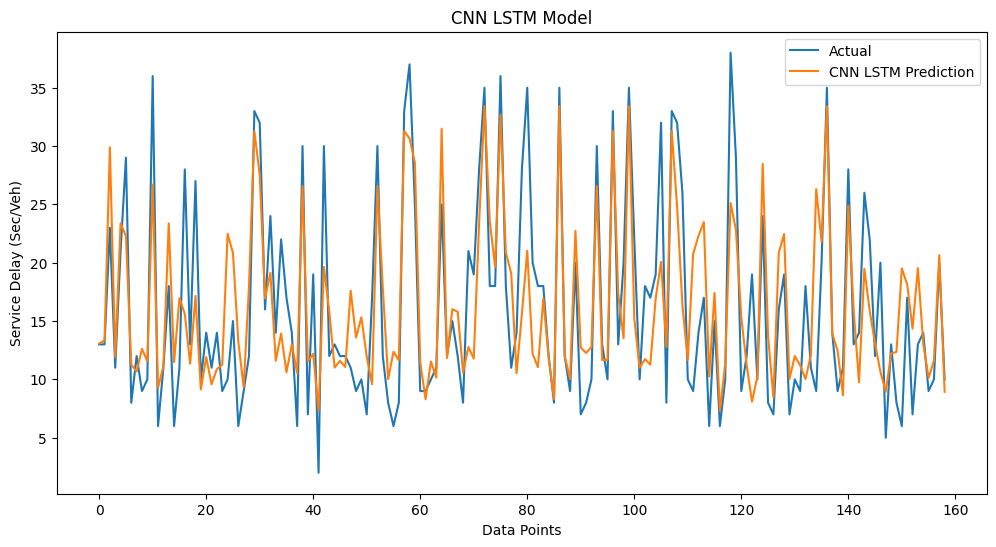

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [92]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/500
40/40 [==============================] - 3s 13ms/step - loss: 292.6989 - val_loss: 212.4202
Epoch 2/500
40/40 [==============================] - 0s 3ms/step - loss: 66.6821 - val_loss: 37.5575
Epoch 3/500
40/40 [==============================] - 0s 3ms/step - loss: 36.1388 - val_loss: 35.8944
Epoch 4/500
40/40 [==============================] - 0s 3ms/step - loss: 33.5234 - val_loss: 34.8943
Epoch 5/500
40/40 [==============================] - 0s 3ms/step - loss: 33.1290 - val_loss: 35.1977
Epoch 6/500
40/40 [==============================] - 0s 4ms/step - loss: 32.3629 - val_loss: 37.3897
Epoch 7/500
40/40 [==============================] - 0s 3ms/step - loss: 33.4858 - val_loss: 34.6380
Epoch 8/500
40/40 [==============================] - 0s 3ms/step - loss: 32.3646 - val_loss: 36.6324
Epoch 9/500
40/40 [==============================] - 0s 3ms/step - loss: 33.2026 - val_loss: 34.3770
Epoch 10/500
40/40 [==============================] - 0s 3ms/step - loss: 32.8224 - val_

Visualize CNN_BiLSTM results

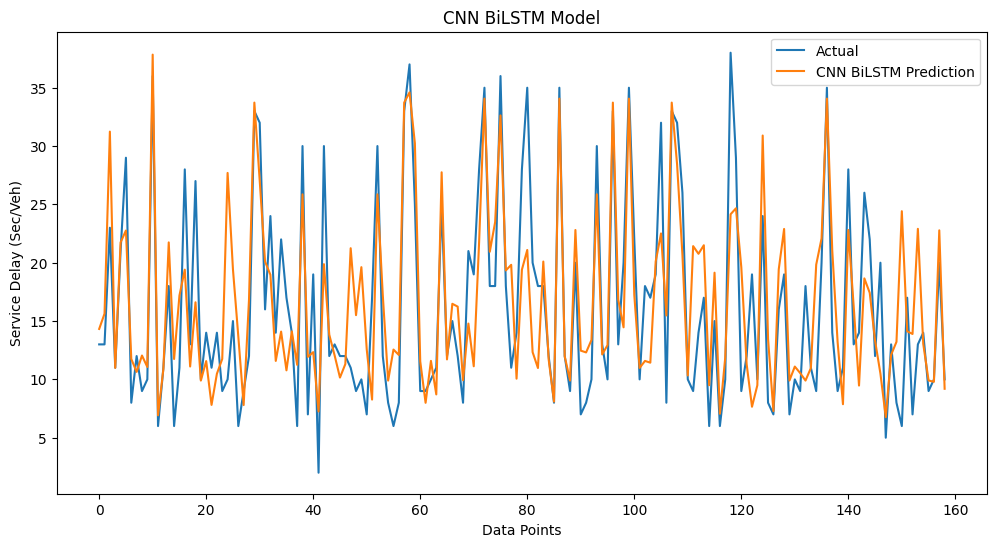

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [86]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

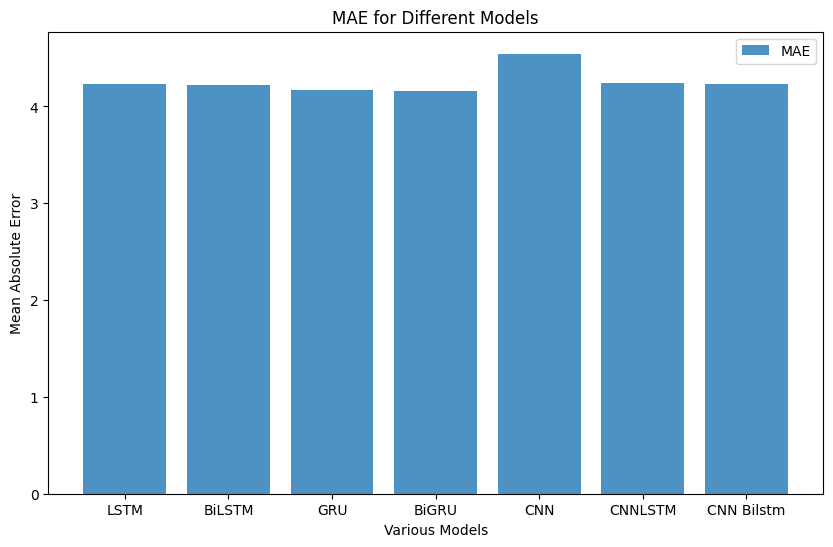

In [87]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

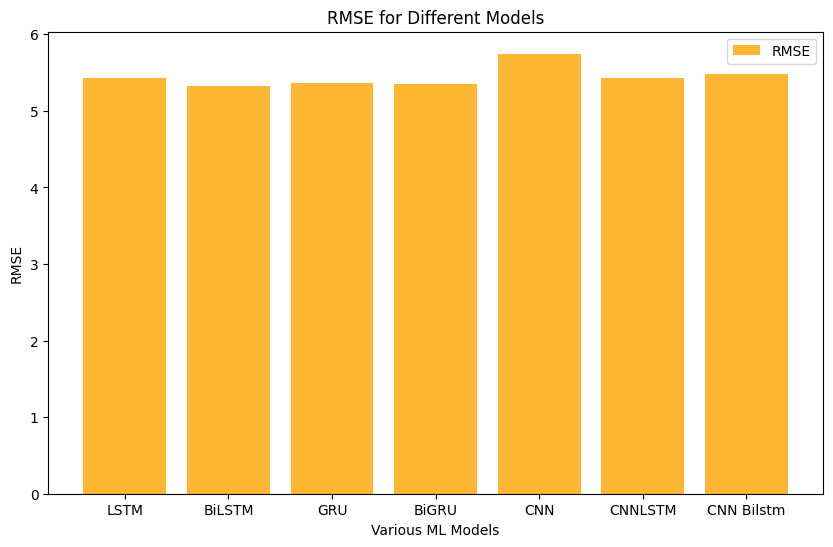

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

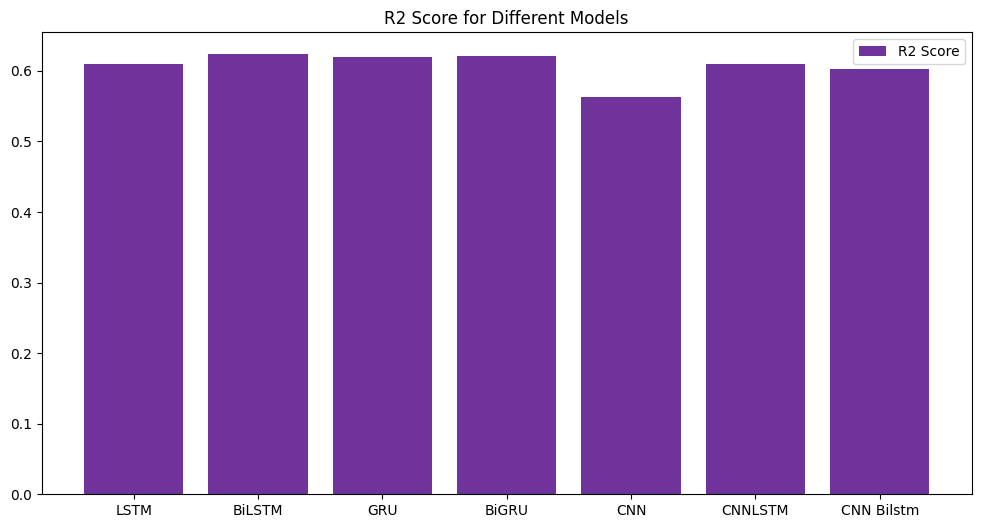

In [89]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [90]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 4.227027020364438
LSTM MSE: 5.430683009448749
LSTM R2 Score: 0.6091091921408306

BiLSTM MAE: 4.225375550348054
BiLSTM MSE: 5.32939512406849
BiLSTM R2 Score: 0.6235542564522673

GRU MAE: 4.168270494952892
GRU MSE: 5.358648114780934
GRU R2 Score: 0.619410301498563

BiGRU MAE: 4.160739475826047
BiGRU MSE: 5.349432586383857
BiGRU R2 Score: 0.6207182132074389

CNN MAE: 4.5444215858507455
CNN MSE: 5.746548185087492
CNN R2 Score: 0.5623160151971605

CNN LSTM MAE: 4.24179818195367
CNN LSTM MSE: 5.4249767143310255
CNN LSTM R2 Score: 0.6099302183117529

CNN BiLSTM MAE: 4.227169411737214
CNN BiLSTM MSE: 5.479111131197872
CNN BiLSTM R2 Score: 0.6021065693663382


Plot predictions for each model

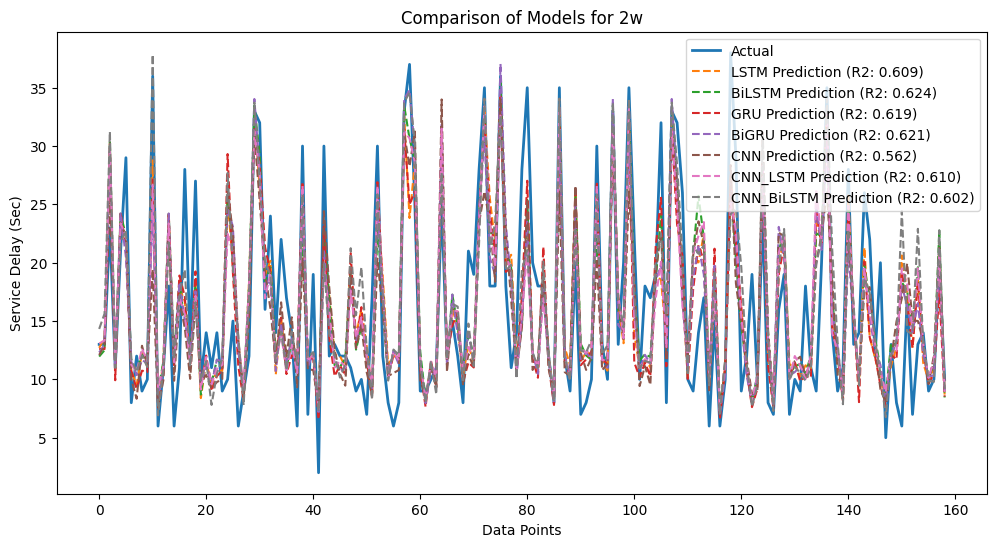

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 2w')
plt.show()

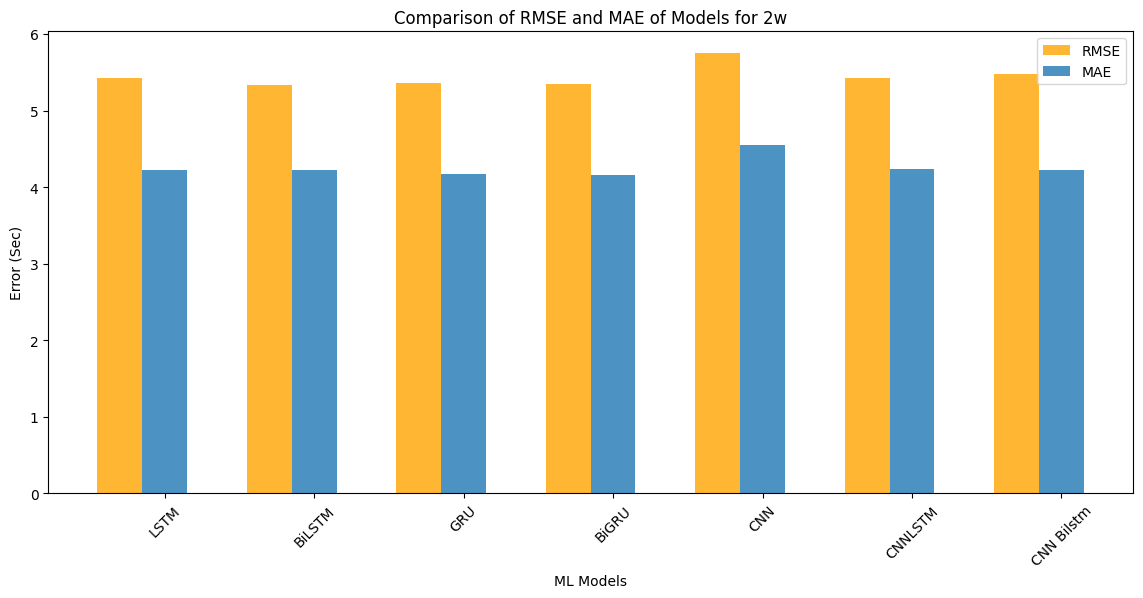

In [84]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 2w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()